# Домашнее задание 10

Построение выборочных характеристик по выборке

## Цель и результат

Вы научитесь строить по выборке описательные статистики, дающие наглядное представление
об изучаемом количественном признаке.

### Задание
1.  Найти в интернете любую независимую выборку объёма не менее 100 наблюдений 
2. Выполнить работу
2.1 Вычислить выборочное среднее, выборочную дисперсию, выборочную квантиль (по заданному пользователем уровню квантили);
2.2 построить графики выборочной функции распределения, гистограммы и/или ядерной оценки плотности вероятности;
2.3 в предположении, что наблюдения имеют нормальное распределение, построить односторонние и двусторонние доверительные интервалы надёжности 0,9 и 0,95 для математического ожидания и дисперсии.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

В качестве датасета возьмем стандартный датасет стоимость жилья в Бостоне

In [2]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Будем работать с признаком LSTAT.

Найдем выборочные среднее, дисперсию и квантиль с помощью встроенных средств pandas.

In [4]:
print("Выборочное среднее:", df_boston['LSTAT'].mean())
print("Выборочная дисперсия:", df_boston['LSTAT'].std())
print("Выборочная квантиль 0.75:", df_boston['LSTAT'].quantile(0.75))

Выборочное среднее: 12.653063241106723
Выборочная дисперсия: 7.141061511348571
Выборочная квантиль 0.75: 16.955000000000002


Найдем выборочные среднее, дисперсию и квантиль с помощью собственных функций

In [5]:
def get_mean(array):
    return sum(array) / len(array)

def get_std(array, square=False, degrees_of_freedom=1):
    arr_mean = get_mean(array)
    if not isinstance(array, np.ndarray):
        array = np.array(array)
    arr_std = np.sum(np.square(array - arr_mean)) / (len(array) - degrees_of_freedom)
    if square:
        return arr_std
    return np.sqrt(arr_std)

def get_quantile(array, quantile=0.5):
    len_array = len(array)
    array = np.sort(array)
    quantile_index = round(len_array*quantile) + 1
    return array[quantile_index]

In [6]:
print("Выборочное среднее:", get_mean(df_boston['LSTAT']))
print("Выборочная дисперсия:", get_std(df_boston['LSTAT']))
print("Выборочная квантиль 0.75:", get_quantile(df_boston['LSTAT'], quantile=0.75))

Выборочное среднее: 12.653063241106723
Выборочная дисперсия: 7.14106151134857
Выборочная квантиль 0.75: 17.1


### Построим графики выборочной функции распределения, гистограммы и ядерной оценки плотности вероятности

In [7]:
def plot_cdf(array):
    """ Печать CDF для произвольного распределения"""
    
    x = np.sort(array)
    y = 1. * np.arange(len(array)) / (len(array) - 1)
    plt.plot(x, y)
    plt.xlabel('x')
    plt.title("Функция распределения")
    plt.grid()
    plt.show()

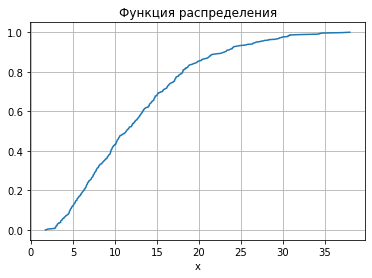

In [8]:
plot_cdf(df_boston['LSTAT'])

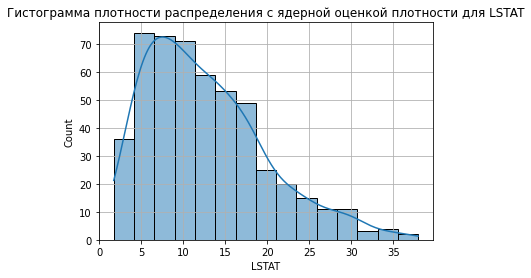

In [9]:
sns.histplot(df_boston['LSTAT'], kde=True)
plt.title("Гистограмма плотности распределения с ядерной оценкой плотности для LSTAT")
plt.grid()
plt.show()

### Построение доверительных интервалов

Предположим, что распределение данных нормальное. Построим односторонние и двусторонние доверительные интервалы надежности для математического ожидания и дисперсии

In [10]:
def norm_conf_interval(array, type_='mean', alpha=0.05, side='both'):
    """ Получение доверительного интервала
    
    Параметры
    ---------
    array : np.array
      Список значений
    type_ : str
      Тип параметра (среднее или СКО)
      Принимает значения mean или std
    alpha : float
      Уровень значимости
    side : str
      Сторона доверительного интервала.
      Принимает значения both, left или rigth
      
    Результат
    ---------
    conf_interval : tuple
    """
    
    side = str(side).lower().strip()
    type_ = str(type_).lower().strip()
    
    assert side in ('both', 'left', 'right')
    assert 0 < alpha < 1
    assert type_ in ('mean', 'std')
    
    if side == 'both':
        betas = [1 - alpha/2]
        if type_ == 'std':
            betas.append(alpha/2)
    else:
        betas = [1 - alpha]
        if type_ == 'std':
            betas.append(alpha)
        
    if type_ == 'mean':
        arr_mean = get_mean(array)
        if side == 'both':
            parameter1 = parameter2 = arr_mean
        elif side == 'left':
            parameter1, parameter2 = np.inf, arr_mean
        else:
            parameter1, parameter2 = arr_mean, np.inf
            
        sem = get_std(array, square=False) / np.sqrt(len(array))
        norm_quantile = stats.norm.ppf(betas[0])
        delta1 = delta2 = sem * norm_quantile
        
    if type_ == 'std':
        
        arr_std_squared = get_std(array, square=True)
        
        if side == 'both':
            parameter1 = parameter2 = arr_std_squared
        elif side == 'left':
            parameter1, parameter2 = np.inf, arr_std_squared
        else:
            parameter1, parameter2 = arr_std_squared, np.inf
            
        chi_quantile_1 = stats.chi2.ppf(betas[0], df=55)
        chi_quantile_2 = stats.chi2.ppf(betas[1], df=55)
        delta1 = arr_std_squared / chi_quantile_1
        delta2 = arr_std_squared / chi_quantile_2
        
    return parameter1-delta1, parameter2+delta2

### Доверительные интервалы для уровня надежности 0.95

In [11]:
alpha = 0.05

print("Двусторонний доверительный интервал для среднего:", 
      norm_conf_interval(df_boston['LSTAT'], type_='mean', alpha=alpha, side='both'))

print("Левосторонний доверительный интервал для среднего:", 
      norm_conf_interval(df_boston['LSTAT'], type_='mean', alpha=alpha, side='left'))

print("Правосторонний доверительный интервал для среднего:", 
      norm_conf_interval(df_boston['LSTAT'], type_='mean', alpha=alpha, side='right'))

print("Двусторонний доверительный интервал для среднего:", 
      norm_conf_interval(df_boston['LSTAT'], type_='std', alpha=alpha, side='both'))

print("Левосторонний доверительный интервал для среднего:", 
      norm_conf_interval(df_boston['LSTAT'], type_='std', alpha=alpha, side='left'))

print("Правосторонний доверительный интервал для среднего:", 
      norm_conf_interval(df_boston['LSTAT'], type_='std', alpha=alpha, side='right'))

Двусторонний доверительный интервал для среднего: (12.030855218363358, 13.275271263850088)
Левосторонний доверительный интервал для среднего: (inf, 13.17523667439453)
Правосторонний доверительный интервал для среднего: (12.130889807818917, inf)
Двусторонний доверительный интервал для среднего: (50.33574616319592, 52.39578714204726)
Левосторонний доверительный интервал для среднего: (inf, 52.303726211112135)
Правосторонний доверительный интервал для среднего: (50.29916926234373, inf)


### Доверительные интервалы для уровня надежности 0.9

In [12]:
alpha = 0.1

print("Двусторонний доверительный интервал для среднего:", 
      norm_conf_interval(df_boston['LSTAT'], type_='mean', alpha=alpha, side='both'))

print("Левосторонний доверительный интервал для среднего:", 
      norm_conf_interval(df_boston['LSTAT'], type_='mean', alpha=alpha, side='left'))

print("Правосторонний доверительный интервал для среднего:", 
      norm_conf_interval(df_boston['LSTAT'], type_='mean', alpha=alpha, side='right'))

print("Двусторонний доверительный интервал для среднего:", 
      norm_conf_interval(df_boston['LSTAT'], type_='std', alpha=alpha, side='both'))

print("Левосторонний доверительный интервал для среднего:", 
      norm_conf_interval(df_boston['LSTAT'], type_='std', alpha=alpha, side='left'))

print("Правосторонний доверительный интервал для среднего:", 
      norm_conf_interval(df_boston['LSTAT'], type_='std', alpha=alpha, side='right'))

Двусторонний доверительный интервал для среднего: (12.130889807818917, 13.17523667439453)
Левосторонний доверительный интервал для среднего: (inf, 13.059903199356413)
Правосторонний доверительный интервал для среднего: (12.246223282857034, inf)
Двусторонний доверительный интервал для среднего: (50.29916926234373, 52.303726211112135)
Левосторонний доверительный интервал для среднего: (inf, 52.20719926756874)
Правосторонний доверительный интервал для среднего: (50.253515821657814, inf)
